In [3]:
#Listing 4.6
from keras.datasets import imdb
from keras import regularizers

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

#size = (input size * hidden layers + hidden layers * output size) + (hidden layers + output size)
#size = (16 * 16 + 16 * 1) + (16 + 1)
size = (4 * 4 + 4 * 1) + (4 + 1)
print('Size: ', size)

2021-11-21 00:30:32.889578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
15/15 [==============================] - 2s 83ms/step - loss: 0.6245 - acc: 0.7222 - val_loss: 0.5042 - val_acc: 0.8407
Epoch 2/20
15/15 [==============================] - 0s 26ms/step - loss: 0.4380 - acc: 0.8836 - val_loss: 0.4165 - val_acc: 0.8769
Epoch 3/20
15/15 [==============================] - 0s 26ms/step - loss: 0.3598 - acc: 0.9061 - val_loss: 0.3838 - val_acc: 0.8734
Epoch 4/20
15/15 [==============================] - 0s 26ms/step - loss: 0.3046 - acc: 0.9271 - val_loss: 0.3738 - val_acc: 0.8710
Epoch 5/20
15/15 [==============================] - 0s 28ms/step - loss: 0.2845 - acc: 0.9283 - val_loss: 0.3525 - val_acc: 0.8848
Epoch 6/20
15/15 [==============================] - 0s 27ms/step - loss: 0.2529 - acc: 0.9423 - val_loss: 0.3369 - val_acc: 0.8890
Epoch 7/20
15/15 [==============================] - 0s 27ms/step - loss: 0.2428 - acc: 0.9436 - val_loss: 0.3479 - val_acc: 0.8850
Epoch 8/20
15/15 [==============================] - 0s 25ms/step - loss: 0.2306 - a

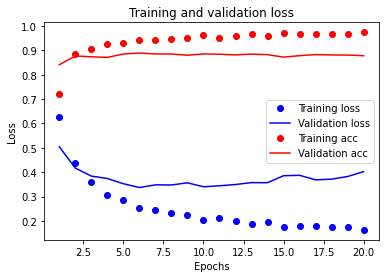

In [4]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
#Listing 4.7
from keras.datasets import imdb
from keras import regularizers

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

#Without regularizer
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model.evaluate(x_test, y_test)

#size = (input size * hidden layers + hidden layers * output size) + (hidden layers + output size)
size = (32 * 32 + 32 * 1) + (32 + 1)
#size = (16 * 16 + 16 * 1) + (16 + 1)
#size = (4 * 4 + 4 * 1) + (4 + 1)
print('Size: ', size)

#With regularizer
model2 = models.Sequential()
model2.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model2.evaluate(x_test, y_test)

#size = (input size * hidden layers + hidden layers * output size) + (hidden layers + output size)
size = (16 * 16 + 16 * 1) + (16 + 1)
#size = (4 * 4 + 4 * 1) + (4 + 1)
print('Size: ', size)

782/782 [==============================] - 1s 935us/step - loss: 0.5687 - acc: 0.8582
Size:  1089
782/782 [==============================] - 1s 931us/step - loss: 0.5830 - acc: 0.8450
Size:  289


No handles with labels found to put in legend.


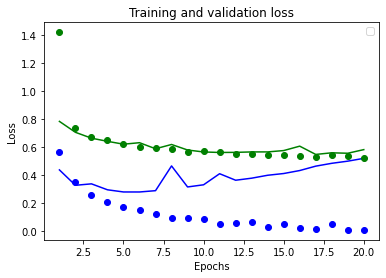

In [40]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs1 = range(1, len(history_dict['acc']) + 1)

history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']

epochs2 = range(1, len(history_dict2['acc']) + 1)

#model1
plt.plot(epochs1, loss_values, 'bo')#, label='TL')
plt.plot(epochs1, val_loss_values, 'b')#, label='VL')
#plt.plot(epochs1, acc_values, 'ro')#, label='TA')
#plt.plot(epochs1, val_acc_values, 'r')#, label='VA')

#model2
plt.plot(epochs2, loss_values2, 'go')#, label='TL')
plt.plot(epochs2, val_loss_values2, 'g')#, label='VL')
#plt.plot(epochs2, acc_values2, 'yo')#, label='TA')
#plt.plot(epochs2, val_acc_values2, 'y')#, label='VA')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()